In [1]:
# Import libraries
%load_ext autoreload
%autoreload 2

import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, HTML, Latex, Image
from IPython.display import Markdown as md
from IPython.core.magic import register_cell_magic
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
import mercury as mr

# Allow for markdown code cells
@register_cell_magic
def markdown(line, cell):
    return md(cell.format(**globals()))

In [2]:
app = mr.App(title="Lab 2", description="Lab report for PHYS 2125 (15921) Spring 2025 Lab 2.")

mercury.App

In [3]:
# Request Data
name = mr.Text(value="Your Name", label="What is your name?", rows=1)
course = mr.Text(value="PHYS 2125 (15921)", label="What class are you in?", rows=1)
date = mr.Text(value="2025-01-24", label="Lab Date", rows=1)
labNum = mr.Text(value="2", label="Lab Number", rows=1)
labName = mr.Text(value="Simple Pendulum", label="Lab Name", rows=1)
file = mr.File(label="Data file upload", max_file_size="10MB")
dq1 = mr.Text(value="Your Answer to Question 1", label="What is the most challenging measurements during data collection and explain why? (4 pts)", rows=5)
dq2 = mr.Text(value="Your Answer to Question 2", label="Why do you include half of the height of the cylinder for the length of the pendulum? (3 pts)", rows=5)
dq3 = mr.Text(value="Your Answer to Question 3", label="What changes of the period of the pendulum you would expect, if you changed the mass of the pendulum? (3 pts)", rows=5)

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.Text

mercury.File

mercury.Text

mercury.Text

mercury.Text

In [4]:
# Parse Data
%autoreload 2

dataColumnNames = ["l (m)", "h (m)","L (m)","5T₁ (s)","5T₂ (s)","T₁ (s)","T₂ (s)","T (s)","T² (s²)","g (m/s²)"];

if file.filepath is not None:
    df = pd.read_csv(file.filepath, names=dataColumnNames, header=0).set_index(dataColumnNames[2])
else:
    df = pd.read_csv('lab2.csv', names=dataColumnNames, header=0).set_index(dataColumnNames[2])

In [5]:
%%markdown

# Lab {labNum.value}: {labName.value}
Name: **{name.value}** \
Class: **{course.value}** \
Date: **{date.value}**

<p style="page-break-after:always;"></p>


# Lab 2: Simple Pendulum
Name: **Your Name** \
Class: **PHYS 2125 (15921)** \
Date: **2025-01-24**

<p style="page-break-after:always;"></p>


In [6]:
# Do Calculations (Python)

# Constants
g_earth = 9.8;

# In theory the data we uploaded already has lots of these values, but just in case the Excel wasn't perfect we're going to do it here.

# Recalculate L
df.rename(columns={dataColumnNames[2]: "oldL"})
df[dataColumnNames[2]] = df.apply(lambda row: row[dataColumnNames[0]] + ( 0.5 * row[dataColumnNames[1]] ), axis=1)
df.set_index(dataColumnNames[2], inplace=True)

# Recalculate T1, T2, T, T^2, and g
df[dataColumnNames[5]] = df.apply(lambda row: 0.2 * row[dataColumnNames[3]], axis=1)
df[dataColumnNames[6]] = df.apply(lambda row: 0.2 * row[dataColumnNames[4]], axis=1)
df[dataColumnNames[7]] = df.apply(lambda row: 0.5 * ( row[dataColumnNames[5]] + row[dataColumnNames[6]] ), axis=1)
df[dataColumnNames[8]] = df.apply(lambda row: row[dataColumnNames[7]] * row[dataColumnNames[7]], axis=1)
df[dataColumnNames[8]] = df.apply(lambda row: row[dataColumnNames[7]] * row[dataColumnNames[7]], axis=1)
df[dataColumnNames[9]] = df.apply(lambda row: 4 * pow(math.pi,2) / ( row[dataColumnNames[8]] / row.name ), axis=1)

# Just get the mean and deviation for everything, pull out what we need
mean = df.mean()
deviation = df.std(ddof=0)

# Calculate average g from measured relationship between L and T.
g_avg = mean[dataColumnNames[9]]
g_avg_σ = deviation[dataColumnNames[9]]
g_avg_err = (g_avg - g_earth) / g_earth * 100
g_avg_err_abs = np.absolute(g_avg_err)

# Calculate g from trendline (least squares)
trend = np.polyfit(df.index, df[dataColumnNames[8]], 1)  # 1 for linear trendline
trend_slope, trend_intercept = trend
g_graph = ( 4 * pow(math.pi, 2) ) / trend_slope
g_graph_err = (g_graph - g_earth) / g_earth * 100
g_graph_err_abs = np.absolute(g_graph_err)

# Strings for printing. (How do we actually handle significant digits? How many significant digits in squinting at a ruler next to a pendulum?)
g_avg_str = str("%.2f" % round(g_avg, 2))
g_avg_σ_str = str("%.2f" % round(g_avg_σ, 2))
g_avg_err_str = str("%.2f" % round(g_avg_err, 2))
g_avg_err_abs_str = str("%.2f" % round(g_avg_err_abs, 2))
g_graph_str = str("%.2f" % round(g_graph, 2))
g_graph_err_str = str("%.2f" % round(g_graph_err, 2))
g_graph_err_abs_str = str("%.2f" % round(g_graph_err_abs, 2))
trend_slope_str = str("%.2f" % round(trend_slope,2))
trend_intercept_str = str("%.2f" % round(trend_intercept,2))

## Objective

To determine the gravitational constant of Earth.

*Hint*: $g_{Earth} = 9.8 m/s^2$.

## Equipment

- (1) small A-base
- (1) long metal rod
- (1) short rod
- (1) 80cm length of string
- (1) calipers
- (1) clamp
- (1) 0.0635 meter aluminum cyliner as pendulum weight
- (1) 1 meter ruler
- (1) stopwatch

<p style="page-break-after:always;"></p>

## Theory

The **period of oscilation** of a pendulum ($T$) is the amount of time required to complete a full cycle (*oscilation*). It is related to the **gravitational constant** ($g$) per the equation:

$$ T = 2\pi \sqrt{\frac{L}{g}} $$

where:

$ T $ is the period of oscilation in $ seconds $, \
$ L $ is the length of pendulum in $ meters $, and \
$ g $ gravitational constant in $ \frac{meters}{seconds^2} $

The value of $ L $ is the sum of the distance from the pivot point to the weight ($l$) plus half the height of the weight ($h$).

$ L = l + \frac{1}{2}h $ \
$ l = $ length from the pivot point to the center of the swinging weight in $ meters $ \
$ h = $ height of the cylinder in $ meters $ 

$ \begin{align*}
T &= 2\pi \sqrt{\frac{L}{g}} \\
T^2 &= 4\pi^2 - \frac{L}{g} \\
T^2 &= \frac{4\pi^2}{g}L \\
\frac{T^2}{L} &= \frac{4\pi^2}{g} \\
g &= \frac{4\pi^2}{\frac{T^2}{L}}
\end{align*}$

By varying the length of the pendulum ($L$) ($x$-axis) and then measuring the effect on $T^2$ ($y$-axis) we can determine the relationship between the two, and use that value to calculate $g$.

In [7]:
display(Image(url='https://raw.githubusercontent.com/dundonite/Physics-Lab-2125-15921/refs/heads/main/lab2setup.png', width=300))

<p style="page-break-after:always;"></p>

## Procedure

The following procedure was followed.

### Initial Setup

The pendulum was constructed as follows.

1. A small cast iron A-base was placed on the table.
1. A 45cm steel rod was secured into the A-frame, raised up as much as possible to maximize the height.
1. The vertical mounting side of a steel clamp was secured at the very top of the rod.
1. A 15cm rod was attached to the horizontal side of the same steel clamp, to the far end of the smaller rod in order to maximize space for the swinging pendulum.
1. 6.35cm aluminum mass was secured with a string, ensuring minimal distance from the knot to the top surface of weight, and a symmetric placement of the knot in the center of that face.
1. The other end of the string was then secured to the small rod, opposite the clamp, by tightly wrapping the string beginning with the loose end.

### Trial (completed for each $l$)

Each measurement was taken twice for each value of $l$.

1. The clamp securing the smaller rod was loosened and the smaller rod was rotated until the desired length ($l$) of the string was reached, at which point the clamp was resecured.
1. The pendulum was set swinging
1. A stopwatch was used to measure the time required to complete 5 oscilations (starting from one extreme and then back, 5 times). This is noted in the data as ($5T_1$). While the pendulum continued to swing a second measurement was taken in the same manner and noted as ($5T_2$).

<p style="page-break-after:always;"></p>

## Data

In [8]:
# Print the data table

df.loc['Average'] = ""
df.loc[['Average'], [dataColumnNames[9]]] = g_avg

HTML(df.to_html())

,l (m),h (m),5T₁ (s),5T₂ (s),T₁ (s),T₂ (s),T (s),T² (s²),g (m/s²)
L (m),,,,,,,,,
0.18175,0.15,0.0635,4.5,4.5,0.9,0.9,0.9,0.81,8.858275
0.23175,0.2,0.0635,5.0,5.0,1.0,1.0,1.0,1.0,9.149123
0.28175,0.25,0.0635,5.5,5.5,1.1,1.1,1.1,1.21,9.192598
0.33175,0.3,0.0635,6.0,6.0,1.2,1.2,1.2,1.44,9.095115
0.38175,0.35,0.0635,6.5,6.5,1.3,1.3,1.3,1.69,8.917684
0.43175,0.4,0.0635,7.0,7.0,1.4,1.4,1.4,1.96,8.69633
Average,,,,,,,,,8.984854


In [9]:
df.drop(['Average'], inplace=True);

<p style="page-break-after:always;"></p>

## Calculations

In [10]:
# Show the math? (LaTeX)

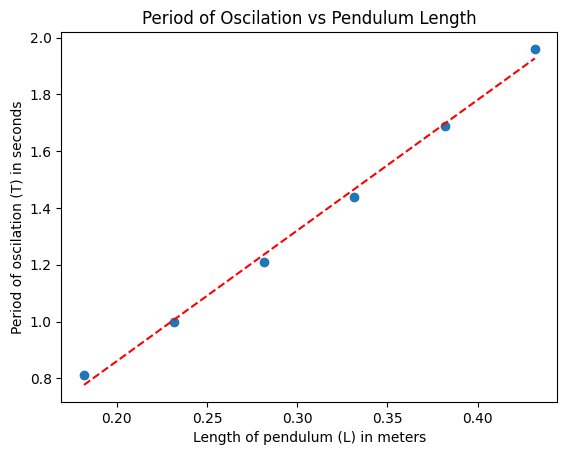

In [11]:
# Print the Graph

# Plot the graph of T^2 (y-axis) vs L (x-axis)
plt.scatter(df.index, df[dataColumnNames[8]])

# Plot the trendline
p = np.poly1d(trend)
plt.plot(df.index, p(df.index), "r--")

# Set some nice labels
plt.xlabel('Length of pendulum (L) in meters')
plt.ylabel('Period of oscilation (T) in seconds')
plt.title('Period of Oscilation vs Pendulum Length')

plt.show();

# Show all of the data points
# Label the axes, including units
# Draw the trendline (don't do connectng points). Use least squares method.
# Show the equation of the line on the page of the graph
# use the equation of the line to determine the slope
# Use this slop to determine g as given in the theory.

In [12]:
%%markdown

Using the least squares method a trend line is fit to the data with *slope* {trend_slope_str} and *$y$-index* {trend_intercept_str}, resulting in the equation $ y = {trend_slope_str} x + {trend_intercept_str} $.


Using the least squares method a trend line is fit to the data with *slope* 4.60 and *$y$-index* -0.06, resulting in the equation $ y = 4.60 x + -0.06 $.


In [13]:
%%markdown

<p style="page-break-after:always;"></p>

## Results

$ \begin{{align*}}
g_{{avg}} &= {g_avg_str}\; m/s^2 \\
g_{{avg}}\; σ &= {g_avg_σ_str} \\
g_{{avg}}\; error &= {g_avg_err_str}\; \% \\
g_{{graph}} &= {g_graph_str}\; m/s^2 \\
g_{{graph}}\; error &= {g_graph_err_str}\; \% \\
g &= g_{{avg}} \pm g_{{avg}}\; error &&= {g_avg_str}\pm{g_avg_err_abs_str}\% \\
  &= g_{{avg}} \pm g_{{avg}}\; σ &&= {g_avg_str}\pm{g_avg_σ_str} \\
  &= g_{{graph}} \pm g_{{graph}}\; error &&= {g_graph_str}\pm{g_graph_err_abs_str} \%
\end{{align*}}$


<p style="page-break-after:always;"></p>

## Results

$ \begin{align*}
g_{avg} &= 8.98\; m/s^2 \\
g_{avg}\; σ &= 0.18 \\
g_{avg}\; error &= -8.32\; \% \\
g_{graph} &= 8.58\; m/s^2 \\
g_{graph}\; error &= -12.43\; \% \\
g &= g_{avg} \pm g_{avg}\; error &&= 8.98\pm8.32\% \\
  &= g_{avg} \pm g_{avg}\; σ &&= 8.98\pm0.18 \\
  &= g_{graph} \pm g_{graph}\; error &&= 8.58\pm12.43 \%
\end{align*}$


In [14]:
%%markdown

<p style="page-break-after:always;"></p>

## Discussion

__What is the most challenging measurements during data collection and explain why? (4 pts)__

{dq1.value}

__Why do you include half of the height of the cylinder for the length of the pendulum? (3 pts)__

{dq2.value}

__What changes of the period of the pendulum you would expect, if you changed the mass of the pendulum? (3 pts)__

{dq3.value}


<p style="page-break-after:always;"></p>

## Discussion

__What is the most challenging measurements during data collection and explain why? (4 pts)__

Your Answer to Question 1

__Why do you include half of the height of the cylinder for the length of the pendulum? (3 pts)__

Your Answer to Question 2

__What changes of the period of the pendulum you would expect, if you changed the mass of the pendulum? (3 pts)__

Your Answer to Question 3
